In [49]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO: 2016-06-28 16:07:38,957 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ncf = NCFile('/artemis/readout/2016-06-26_231642_off_on_cw_2_dB_dac.nc',)

In [22]:
!ls -lhtr /artemis/readout/2016-06-20_225728_off_on_cw_2_dB_dac.nc

-rwxrwxr-x 1 500 500 1.3G Jun 20 23:01 /artemis/readout/2016-06-20_225728_off_on_cw_2_dB_dac.nc


In [4]:
ssa = measurement.basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)

In [35]:
sslist = [ssa.sweep_stream(k) for k in range(4)]

In [36]:
for ss in sslist:
    ss.set_q_and_x()

In [38]:
[np.median(ss.S_yy[-20:])/((1/np.real(1/ss.resonator.Q_e))**2/(ss.resonator.Q**4)) for ss in sslist]

[9.8491381188662711e-11,
 1.6434070840415857e-09,
 3.8616013608665436e-08,
 5.4754750047954194e-11]

In [40]:
[((1/np.real(1/ss.resonator.Q_e))**2/(ss.resonator.Q**4)) for ss in sslist]

[3.3250035613519505e-07,
 6.1362605061121157e-10,
 3.3196074442111141e-09,
 7.5827540455948791e-08]

In [41]:
[ss.resonator.Q for ss in sslist]

[26159.532218875313, 76456.491550813313, 39355.42518631876, 293663.87999405136]

In [39]:
[np.median(ss.S_yy[-20:]) for ss in sslist]

[3.2748419321477603e-17,
 1.0084373985269256e-18,
 1.2819000624108347e-16,
 4.1519180244166108e-18]

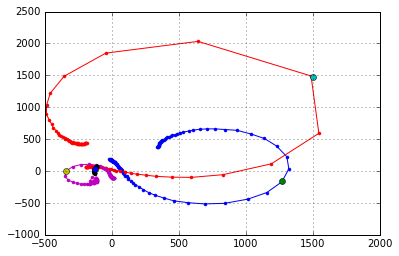

In [46]:
for ss in sslist:
    plot_ri(ss.sweep.s21_point,'.-')
    plot_ri(ss.stream.s21_point,'o')
grid()    

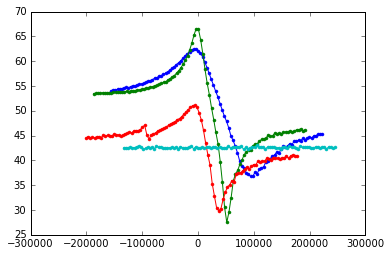

In [45]:
for ss in sslist:
    plot(ss.sweep.frequency-ss.resonator.f_0,dB(ss.sweep.s21_point),'.-')
#grid()    

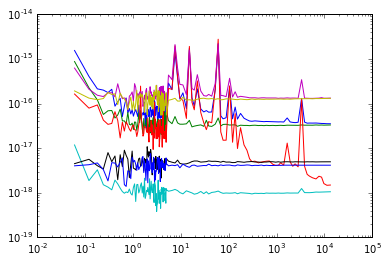

In [34]:
for k in range(4):
    ss = ssa.sweep_stream(k)
    loglog(ss.S_frequency,ss.S_xx)
    loglog(ss.S_frequency,ss.S_yy)

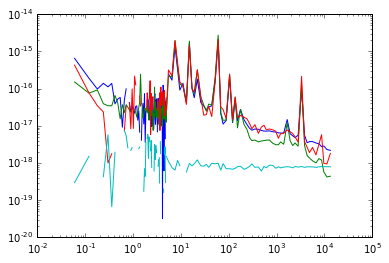

In [47]:
for k in range(4):
    ss = ssa.sweep_stream(k)
    loglog(ss.S_frequency,ss.S_xx-ss.S_yy)

In [53]:
for ss in sslist:
    ss.psd_xx,ss.psd_f = mlab.psd(ss.x,NFFT=2**19,Fs=ss.stream.stream_sample_rate)
    ss.psd_yy,ss.psd_f = mlab.psd(ss.x,NFFT=2**19,Fs=ss.stream.stream_sample_rate)

<IPython.core.display.Javascript object>


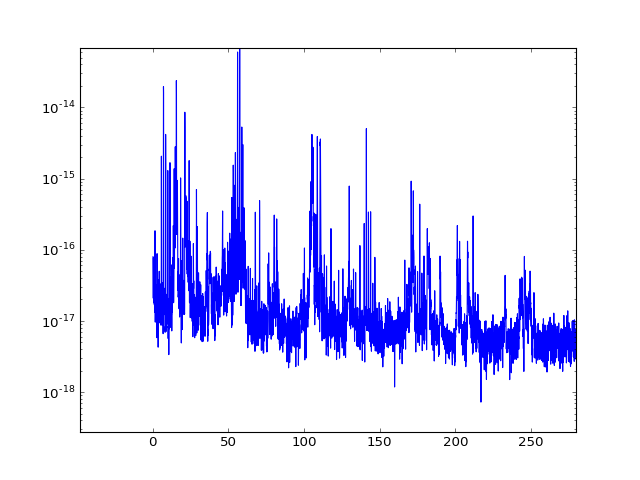

In [54]:
ss = sslist[1]
semilogy(ss.psd_f[2:],ss.psd_xx[2:])

In [55]:
from kid_readout.analysis.timedomain import filters

In [57]:
31e3/128.

242.1875

In [59]:
lpx = filters.lpf(ss.x,num_taps=1024,cutoff=1/64.,decimate_by=64)

/home/gjones/kid_readout/kid_readout/analysis/timedomain/fftfilt.py:78: ComplexWarning: Casting complex values to real discards the imaginary part


In [60]:
lpx.shape

(65520,)

In [70]:
import scipy.io.wavfile

In [71]:
scipy.io.wavfile.write('test.wav',8192,2**14*(lpx-lpx.mean())/lpx.ptp())

<IPython.core.display.Javascript object>


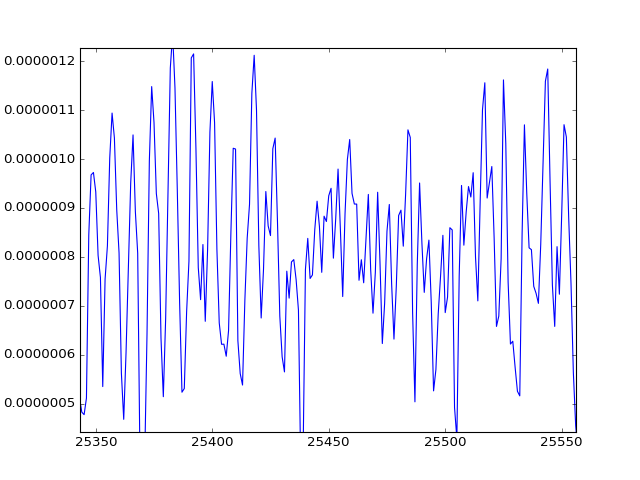

In [66]:
figure()
plot(lpx)

<IPython.core.display.Javascript object>


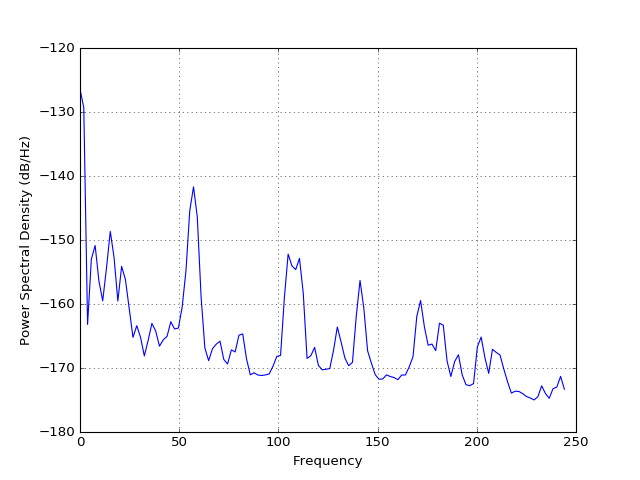

In [65]:
figure()
blah = psd(lpx,Fs=512e6/2**14/64)

In [23]:
ss = ssa.sweep_stream(3)

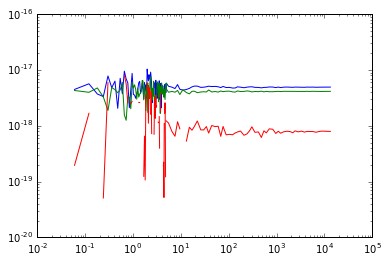

In [24]:
loglog(ss.S_frequency,ss.S_xx)
loglog(ss.S_frequency,ss.S_yy)
loglog(ss.S_frequency,ss.S_xx-ss.S_yy)


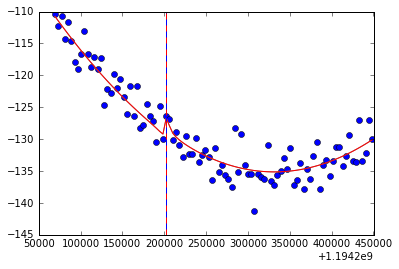

In [25]:
ss.resonator.plot()
axvline(ss.stream.frequency)
axvline(ss.resonator.f_0,color='r',linestyle='--')

In [32]:
ss.resonator.A_mag*ss.resonator.Q*np.real(1/ss.resonator.Q_e)

1.6664416603153762

In [33]:
ss.resonator.A_mag

134.75786803342049

In [16]:
df = ssa.to_dataframe()

In [17]:
df.shape

(32, 90)

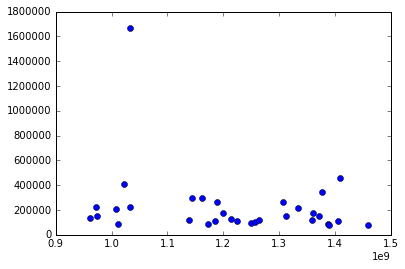

In [18]:
plot(df.res_f_0, df.res_Q_i,'o')

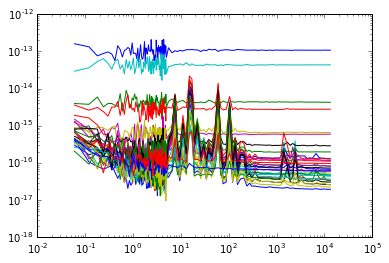

In [19]:
for k,row in df.iterrows():
    loglog(row.S_frequency,row.S_xx)

In [15]:
df.Q

AttributeError: 'DataFrame' object has no attribute 'Q'

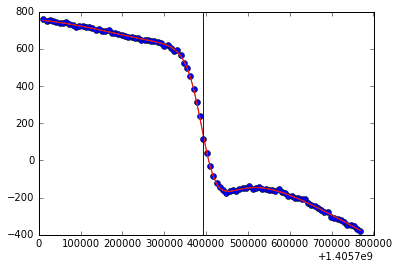

In [23]:
ss.resonator.plot()
axvline(ss.stream.frequency)

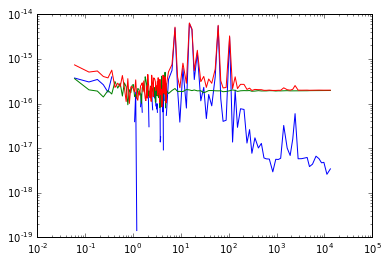

In [24]:
loglog(ss.S_frequency,ss.S_xx-ss.S_yy)

loglog(ss.S_frequency,ss.S_yy)
loglog(ss.S_frequency,ss.S_xx)


In [18]:
np.abs(ss.stream.s21_raw).argmax()

1366815

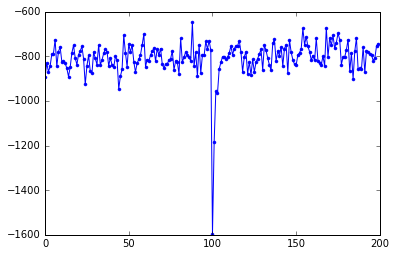

In [19]:
plot(ss.stream.s21_raw[1366815-100:1366815+100],'.-')

In [36]:
loglog(ss.S_frequency,ss.S_yy)
ss.S_frequency.max()

13312.011957168579